# Pointing Experiment

In [ ]:
# Workload distribution:
# Jonas Puchinger:
# - all code and text in this notebook
# Maximilian Kögl:
# - ideas for evaluation of pointing performance
# - search for literature on the design of the study

For this study on pointing performance, a multifactorial within-subjects design was employed. Participants were asked to select one of four ellipses presented on a notebook screen. The one to select was highlighted by green color, the other ones were red. Independent variables consist of the width of the presented ellipses, as well as wether a helping pointing technique was employed while selecting the target or not. Two different widths were chosen for the ellipses, small (19 px) and big (94 px). These sizes were adapted from Card, English & Burr [1], who used the target-widths of 1, 2, 4 and 10 characters. We chose the widths of 2 and ten characters to ensure a big enough differnece between the two sizes. To convert the character widths, a scale of 1 character = 0.25cm = 9.4px (on a screnn with a resolution of 96dpi) was used. The supporting pointing technique helps the participant to select the target faster by dragging the cursor onto the center of the target, if the cursor is close to the target. The radius, in which the cursor is dragged onto the target is the same for both sizes of targets. This means, that the effective area of assistance is greater for the smaller targets, therefore making for a more effective supporting pointing technique in the case of greater need for said support. This setup makes for a total of four conditions: Small Target with No Pointing Technique (SN), Small Target with Pointing Technique (SP), Big Target with No Pointing Technique (BN), and Big Target with Pointing Technique (BP). Each participant was presented with ten repetitions of each of the four repetitions, making for a total of 40 trials per participant. To minimize carry-over- and learning-effects as well as the effect of fatigue, the sequence, in which the conditions were presented, was counterbalanced using Balanced Latin Squares. The time a particiant needs to click a target was the dependent variable in this study. Control variables for this study make for the technical setup of the experiment. For all participants, the same notebook and the same mouse were used, with the same screen and pointer settings for each round of the experiment. Another control variable was the setting, for which a quiet laboratory was chosen. Random and confounding variables consist of unexpected behaviour of people in the vicinity of the participant. All four participants were male and students. The hypothesis before the experiment is the following: The reaction time of a participant is lower if the target is bigger and the suppoting pointing technique is applied.

[1] STUART K. CARD, WILLIAM K. ENGLISH & BETTY J. BURR (1978) Evaluation of Mouse, Rate-Controlled Isometric Joystick, Step Keys, and Text Keys for Text Selection on a CRT, Ergonomics, 21:8, 601-613, DOI: 10.1080/00140137808931762 

# Setup for Data Analysis

In [1]:
%matplotlib inline
from pylab import *
from scipy.stats import ttest_ind, ttest_rel

Variables and Constants

In [2]:
SMALL_WIDTH = 19
BIG_WIDTH = 94
# all data
data = []
# data for attempts with small targets and no pointing technique
sn_data = []
# data for attempts with small targets and pointing technique
sp_data = []
# data for attempts with big targets and no pointing technique
bn_data = []
# data for attempts with big targets and pointing technique
bp_data = []

Reading in csv data from logfile

In [4]:
data = genfromtxt("pointing_experiment_results.csv", dtype=None, 
                  delimiter=",", names=True, encoding="UTF-8")

Split data according to conditions

In [5]:
sn_data = [line for line in data if line[3] == SMALL_WIDTH and line[2] == False]
sp_data = [line for line in data if line[3] == SMALL_WIDTH and line[2] == True]
bn_data = [line for line in data if line[3] == BIG_WIDTH and line[2] == False]
bp_data = [line for line in data if line[3] == BIG_WIDTH and line[2] == True]

# Visualizing Results

In [6]:
ID = range(len(sn_data))

Scatterplot for Condition SN. Small Target, No Pointing Technique

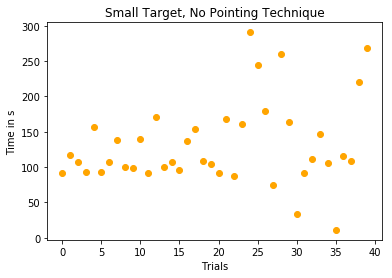

In [17]:
sn_times = [float(x[9]) for x in sn_data]
sn_scatter = scatter(ID, sn_times, color = 'orange')
title("Small Target, No Pointing Technique")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for Condition SP. Small Target, Pointing Technique

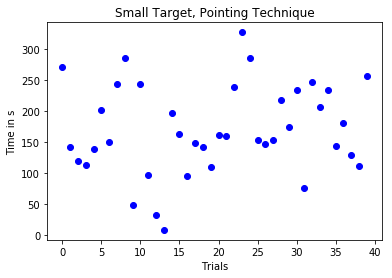

In [18]:
sp_times = [float(x[9]) for x in sp_data]
sp_scatter = scatter(ID, sp_times, color = 'blue')
title("Small Target, Pointing Technique")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for Condition BN. Big Target, No Pointing Technique

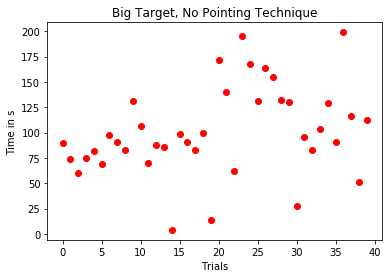

In [19]:
bn_times = [float(x[9]) for x in bn_data]
bn_scatter = scatter(ID, bn_times, color = 'red')
title("Big Target, No Pointing Technique")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for Condition BP. Big Target, Pointing Technique

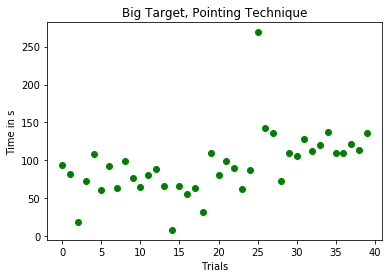

In [20]:
bp_times = [float(x[9]) for x in bp_data]
bp_scatter = scatter(ID, bp_times, color = 'green')
title("Big Target, Pointing Technique")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for all conditions.

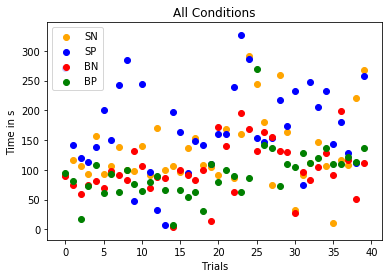

In [11]:
scatter(ID, sn_times, color = 'orange')
scatter(ID, sp_times, color = 'blue')
scatter(ID, bn_times, color = 'red')
scatter(ID, bp_times, color = 'green')

title("All Conditions")
legend((sn_scatter, sp_scatter, bn_scatter, bp_scatter),
      ('SN','SP','BN','BP'))
ylabel("Time in s")
xlabel("Trials")
show()

Boxplots for all conditions.

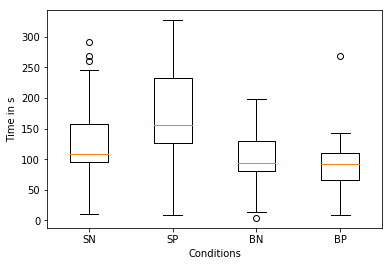

In [12]:
boxplot([sn_times, sp_times, bn_times, bp_times])
xticks([1,2,3,4], ['SN','SP','BN','BP'])
xlabel("Conditions")
ylabel("Time in s")
show()

Splitting data according to experiment participants

In [22]:
participant_data = {
    "1": [line for line in data if line[0] == 1],
    "2": [line for line in data if line[0] == 2],
    "3": [line for line in data if line[0] == 3],
    "4": [line for line in data if line[0] == 4],
}

In [26]:
ID_p = range(len(participant_data["1"]))

Scatterplot for Participant 1.

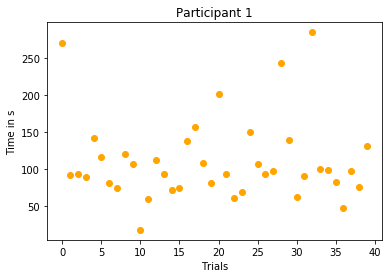

In [28]:
p1_times = [float(x[9]) for x in participant_data["1"]]
p1_scatter = scatter(ID_p, p1_times, color = 'orange')
title("Participant 1")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for Participant 2.

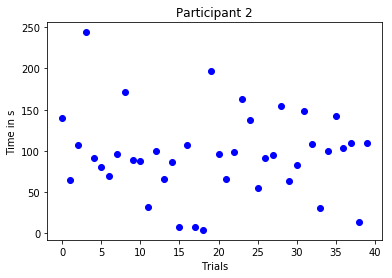

In [30]:
p2_times = [float(x[9]) for x in participant_data["2"]]
p2_scatter = scatter(ID_p, p2_times, color = 'blue')
title("Participant 2")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for Participant 3.

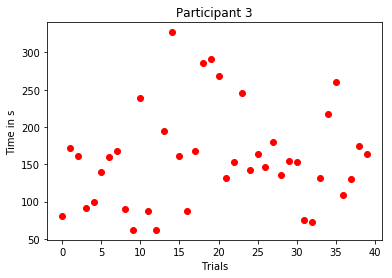

In [31]:
p3_times = [float(x[9]) for x in participant_data["3"]]
p3_scatter = scatter(ID_p, p3_times, color = 'red')
title("Participant 3")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for Participant 4.

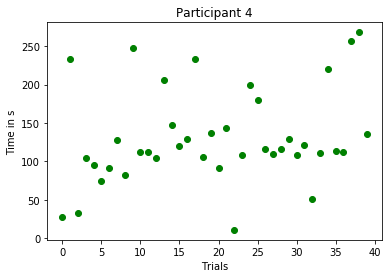

In [33]:
p4_times = [float(x[9]) for x in participant_data["4"]]
p4_scatter = scatter(ID_p, p4_times, color = 'green')
title("Participant 4")
ylabel("Time in s")
xlabel("Trials")
show()

Scatterplot for all Participants.

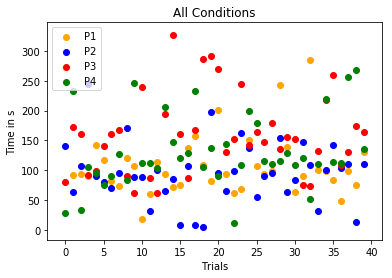

In [34]:
scatter(ID_p, p1_times, color = 'orange')
scatter(ID_p, p2_times, color = 'blue')
scatter(ID_p, p3_times, color = 'red')
scatter(ID_p, p4_times, color = 'green')

title("All Conditions")
legend((p1_scatter, p2_scatter, p3_scatter, p4_scatter),
      ('P1','P2','P3','P4'))
ylabel("Time in s")
xlabel("Trials")
show()

Boxplot for all Participants.

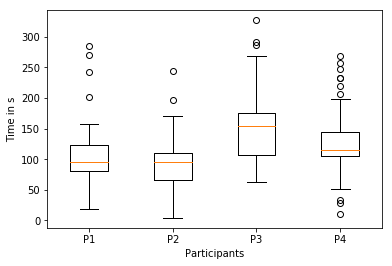

In [35]:
boxplot([p1_times, p2_times, p3_times, p4_times])
xticks([1,2,3,4], ['P1','P2','P3','P4'])
xlabel("Participants")
ylabel("Time in s")
show()

# Pointing Performance Evaluation

Index of Performance according to Fitts (https://en.wikipedia.org/wiki/Fitts's_law)

Scatterplot of Index of Performance for Condition SN. Small Target, No Pointing Technique.

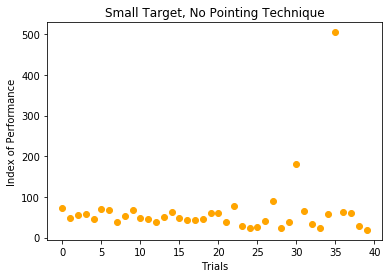

In [50]:
sn_indices = [float(x[11]) for x in sn_data]
sni_scatter = scatter(ID, sn_indices, color = 'orange')
title("Small Target, No Pointing Technique")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for Condition SP. Small Target, Pointing Technique.

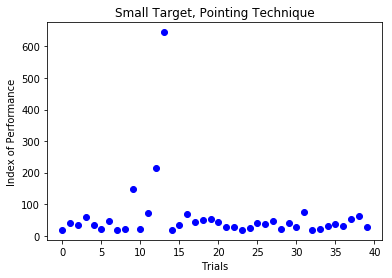

In [39]:
sp_indices = [float(x[11]) for x in sp_data]
spi_scatter = scatter(ID, sp_indices, color = 'blue')
title("Small Target, Pointing Technique")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for Condition BN. Big Target, No Pointing Technique.

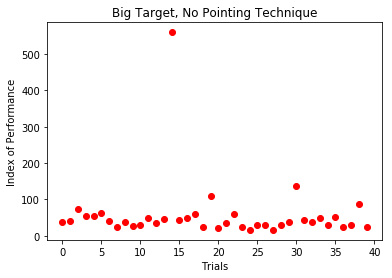

In [41]:
bn_indices = [float(x[11]) for x in bn_data]
bni_scatter = scatter(ID, bn_indices, color = 'red')
title("Big Target, No Pointing Technique")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for Condition BN. Big Target, No Pointing Technique.

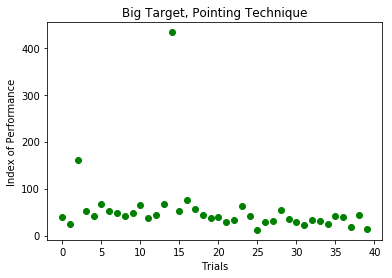

In [43]:
bp_indices = [float(x[11]) for x in bp_data]
bpi_scatter = scatter(ID, bp_indices, color = 'green')
title("Big Target, Pointing Technique")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for all Conditions.

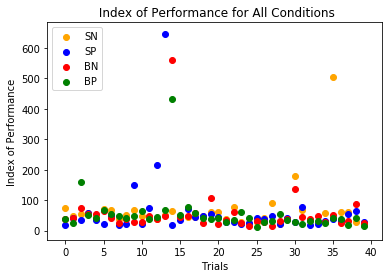

In [51]:
scatter(ID, sn_indices, color = 'orange')
scatter(ID, sp_indices, color = 'blue')
scatter(ID, bn_indices, color = 'red')
scatter(ID, bp_indices, color = 'green')

title(" Index of Performance for All Conditions")
legend((sni_scatter, spi_scatter, bni_scatter, bpi_scatter),
      ('SN','SP','BN','BP'))
ylabel("Index of Performance")
xlabel("Trials")
show()

Boxplot for Index of Performance of all Conditions.

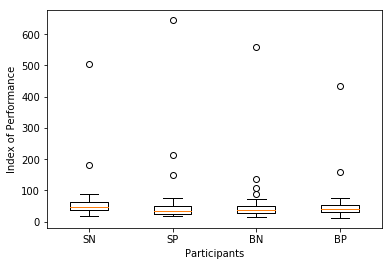

In [45]:
boxplot([sn_indices, sp_indices, bn_indices, bp_indices])
xticks([1,2,3,4], ['SN','SP','BN','BP'])
xlabel("Participants")
ylabel("Index of Performance")
show()

Scatterplot of Index of Performance for Participant 1.

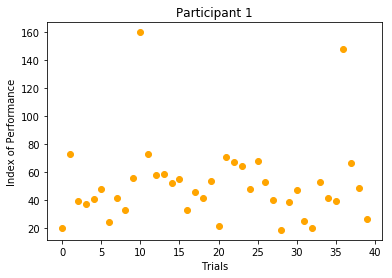

In [52]:
p1_indices = [float(x[11]) for x in participant_data["1"]]
p1i_scatter = scatter(ID, p1_indices, color = 'orange')
title("Participant 1")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for Participant 2.

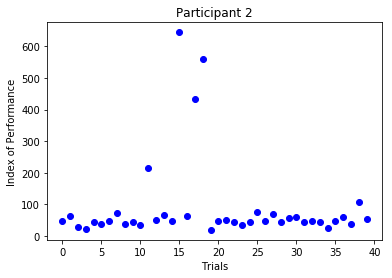

In [48]:
p2_indices = [float(x[11]) for x in participant_data["2"]]
p2i_scatter = scatter(ID, p2_indices, color = 'blue')
title("Participant 2")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for Participant 3.

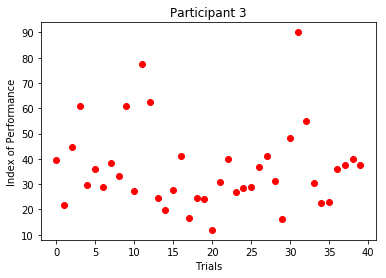

In [49]:
p3_indices = [float(x[11]) for x in participant_data["3"]]
p3i_scatter = scatter(ID, p3_indices, color = 'red')
title("Participant 3")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for Participant 4.

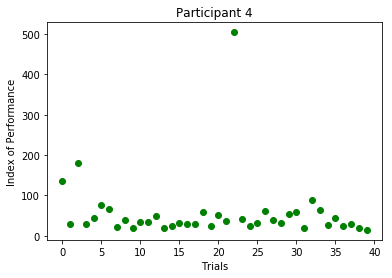

In [54]:
p4_indices = [float(x[11]) for x in participant_data["4"]]
p4i_scatter = scatter(ID, p4_indices, color = 'green')
title("Participant 4")
ylabel("Index of Performance")
xlabel("Trials")
show()

Scatterplot of Index of Performance for all Conditions.

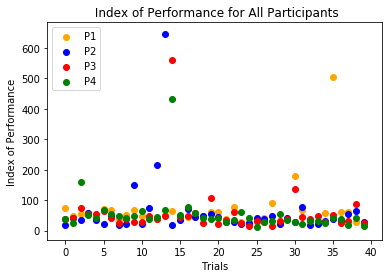

In [55]:
scatter(ID, sn_indices, color = 'orange')
scatter(ID, sp_indices, color = 'blue')
scatter(ID, bn_indices, color = 'red')
scatter(ID, bp_indices, color = 'green')

title(" Index of Performance for All Participants")
legend((p1i_scatter, p2i_scatter, p3i_scatter, p4i_scatter),
      ('P1','P2','P3','P4'))
ylabel("Index of Performance")
xlabel("Trials")
show()

Boxplot for Index of Performance of all Participants.

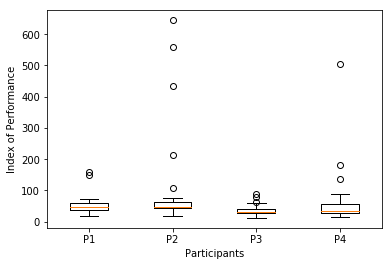

In [56]:
boxplot([p1_indices, p2_indices, p3_indices, p4_indices])
xticks([1,2,3,4], ['P1','P2','P3','P4'])
xlabel("Participants")
ylabel("Index of Performance")
show()

# Statistical Tests

t-test for both small-target conditions.

In [13]:
t_statistic, p_value = ttest_ind(sn_times, sp_times)
print("p-value: %2.30f" %(p_value))

p-value: 0.011598413044327949422696022452


t-test for both big-target conditions.

In [14]:
t_statistic, p_value = ttest_ind(bn_times, bp_times)
print("p-value: %2.30f" %(p_value))

p-value: 0.414535712657600696751103441784


t-test for no pointing technique conditions and pointing technique conditions.

In [15]:
n_condition = sn_times + bn_times
p_condition = sp_times + bp_times
t_statistic, p_value = ttest_ind(n_condition, p_condition)
print("p-value: %2.30f" %(p_value))

p-value: 0.127021533183106577480359078436


t-test for small target conditions and big target conditions.

In [16]:
s_condition = sn_times + sp_times
b_condition = bn_times + bp_times
t_statistic, p_value = ttest_ind(s_condition, b_condition)
print("p-value: %2.30f" %(p_value))

p-value: 0.000000027748999249197518787167


t-test of Index of Performance for both small-target conditions.

In [59]:
t_statistic, p_value = ttest_ind(sn_indices, sp_indices)
print("p-value: %2.30f" %(p_value))

p-value: 0.839119231418747890671738787205


t-test of Index of Performance for both big-target conditions.

In [60]:
t_statistic, p_value = ttest_ind(bn_indices, bp_indices)
print("p-value: %2.30f" %(p_value))

p-value: 0.850717326260246098357242772181


t-test of Index of Performance for no pointing technique conditions and pointing technique conditions.

In [61]:
n_condition_indices = sn_indices + bn_indices
p_condition_indices = sp_indices + bp_indices
t_statistic, p_value = ttest_ind(n_condition_indices, p_condition_indices)
print("p-value: %2.30f" %(p_value))

p-value: 0.780572893116592059215008703177


t-test of Index of Performance for small target conditions and big target conditions.

In [62]:
s_condition_indices = sn_indices + sp_indices
b_condition_indices = bn_indices + bp_indices
t_statistic, p_value = ttest_ind(s_condition_indices, b_condition_indices)
print("p-value: %2.30f" %(p_value))

p-value: 0.631186280699386093040459400072


# Results

The study shows, that there is a significant difference between the reaction times of participants when the size of the targets is varied. Reaction times for bigger targets are noticeably faster than the ones for smaller targets (p < 0.001). This confirmes part of our original hypothesis. Concerning the other factor and independent variable, wether the supporting pointing technique was applied when selecting a presented target or not made little to no difference for the reaction times of participants. The corresponding t-test shows a significance of only 0.127, which is not statistically significant to a high enough degree. The second part of our original hypotheses is therefore untrue. To enhance the effectivness of the pointing technique, the radius around a target, in which the cursor gets pulled in, could be increased. The analysis of the Index of Performance according to Fitts, a measure of how fast a human participant can select a target given a certain difficulty of selection, shows that there are almost no differences in pointing performance regardless of which condition was presented to the participants. Neither the visualisations nor the respective t-test reveal any statistical evidence or significance for such a phenomenon. This leads to the conclusion, that in our experiment, the difficulty of selection gets easier to the same degree as the the reaction time for the selection decreases.